In [1]:
import matplotlib.pyplot as plt
import numpy.typing as npt

from sklearn.base import BaseEstimator
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

**Comparazione tra diversi classificatori**

In questa esercitazione, compareremo le performance di diversi classificatori sul dataset Iris.

Per iniziare, definiamo la procedura `show_results`, che ci permette di mostrare a schermo il report di classificazione e la matrice di confusione ottenuta dall'algoritmo sui valori di test.

In [2]:
def show_results(
        clf: BaseEstimator,
        X_train: npt.ArrayLike,
        X_test: npt.ArrayLike,
        y_train: npt.ArrayLike,
        y_test: npt.ArrayLike) -> None:
    """ Utility per stampare i risultati di classificazione.

    Argomenti:
        clf: algoritmo di classificazione da testare
        X_train: campioni di training
        X_test: campioni di testing
        y_train: label di training
        y_test: label di testing
    """
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

Creiamo i dataset di training e di testing usando il metodo [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), e valutiamo ogni singolo metodo.

In [3]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



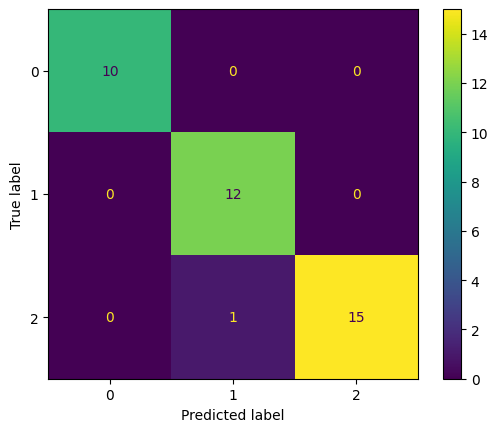

In [4]:
show_results(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



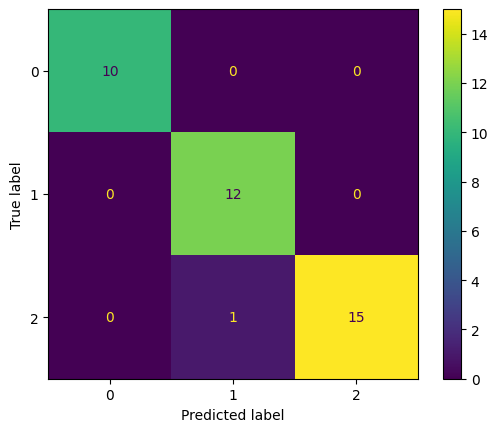

In [5]:
show_results(RandomForestClassifier(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        16

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



c:\Users\acard\.virtualenvs\pcs-exercises-4jw-2ggn\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


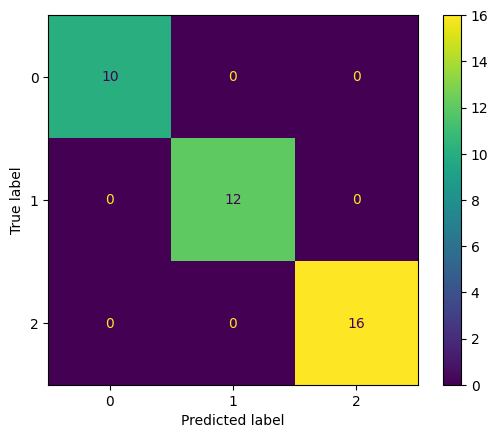

In [6]:
show_results(MLPClassifier(), X_train, X_test, y_train, y_test)

I risultati sono comparabili (ed egualmente soddisfacenti) per ciascuno degli algoritmi considerati. Di conseguenza, in casi così semplici, ognuno degli algoritmi considerati può essere utilizzato con efficacia, e la scelta dovrebbe ricadere sul meno complesso dal punto di vista computazionale che, in questo caso specifico, è plausibilmente l'albero decisionale.